<a href="https://colab.research.google.com/github/jaeohshin/ML_with_Pytorch_Sklearn_rasbt/blob/main/ch12_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

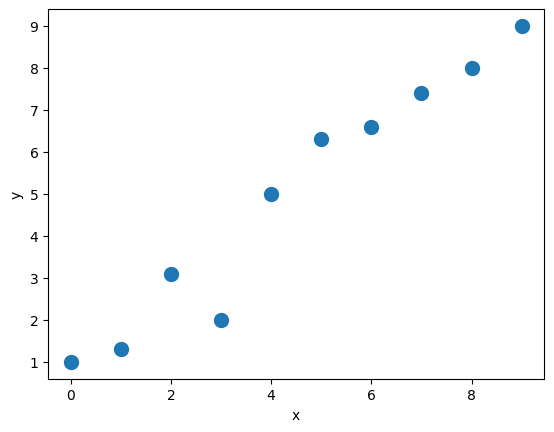

In [ ]:
x_train = np.arange(10, dtype='float32').reshape((10,1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6,
                    7.4, 8.0, 9.0], dtype='float32')

plt.plot(x_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

x_train_norm = (x_train - np.mean(x_train)) / np.std(x_train)
x_train_norm = torch.from_numpy(x_train_norm)

y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(x_train_norm, y_train)

batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [ ]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

def model(xb):
    return xb @ weight + bias

def loss_fn(input, target):
    return (input-target).pow(2).mean()


learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()

        with torch.no_grad():
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate
            weight.grad.zero_()
            bias.grad.zero_()

    if epoch % log_epochs == 0 :
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 45.0782
Epoch 10 Loss 26.4366
Epoch 20 Loss 1.5918
Epoch 30 Loss 14.1307
Epoch 40 Loss 11.6038
Epoch 50 Loss 6.3084
Epoch 60 Loss 0.6349
Epoch 70 Loss 3.1374
Epoch 80 Loss 1.9999
Epoch 90 Loss 0.3133
Epoch 100 Loss 0.7653
Epoch 110 Loss 1.0039
Epoch 120 Loss 0.0235
Epoch 130 Loss 0.5176
Epoch 140 Loss 0.0759
Epoch 150 Loss 1.8789
Epoch 160 Loss 0.0008
Epoch 170 Loss 0.0866
Epoch 180 Loss 0.0646
Epoch 190 Loss 0.0011


Final parameters: 2.6696107387542725 4.879678249359131


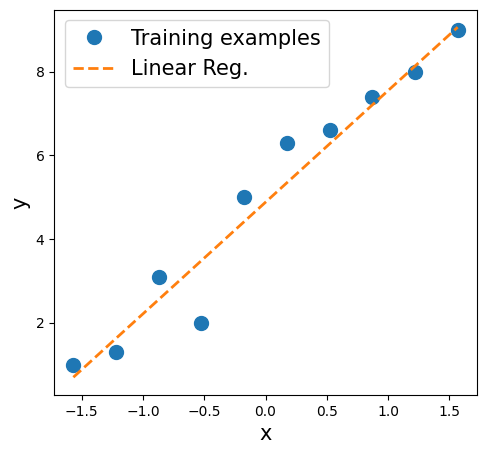

In [ ]:
print ('Final parameters:', weight.item(), bias.item())

x_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
x_test_norm = (x_test - np.mean(x_train)) / np.std(x_train)
x_test_norm = torch.from_numpy(x_test_norm)
y_pred = model(x_test_norm).detach().numpy()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(x_train_norm, y_train, 'o', markersize=10)
plt.plot(x_test_norm, y_pred, '--', lw=2)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
plt.show()

In [ ]:
import torch.nn as nn

input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)

loss_fn = nn.MSELoss(reduction='mean')

optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:, 0]

        loss = loss_fn(pred, y_batch)

        loss.backward()

        optimizer.step()

        optimizer.zero_grad()

    if epoch % log_epochs == 0 :
        print(f'Epoch {epoch} Loss {loss.item():.4f}')


Epoch 0 Loss 6.6399
Epoch 10 Loss 9.9786
Epoch 20 Loss 14.8893
Epoch 30 Loss 1.2181
Epoch 40 Loss 0.0875
Epoch 50 Loss 7.2953
Epoch 60 Loss 4.0330
Epoch 70 Loss 3.5374
Epoch 80 Loss 0.0118
Epoch 90 Loss 0.2742
Epoch 100 Loss 1.2748
Epoch 110 Loss 0.7202
Epoch 120 Loss 0.6854
Epoch 130 Loss 0.1486
Epoch 140 Loss 0.2882
Epoch 150 Loss 0.2050
Epoch 160 Loss 0.0288
Epoch 170 Loss 0.4469
Epoch 180 Loss 0.0986
Epoch 190 Loss 0.9830


In [ ]:
print('Final Parameters:', model.weight.item(), model.bias.item())

Final Parameters: 2.6604113578796387 4.869062900543213


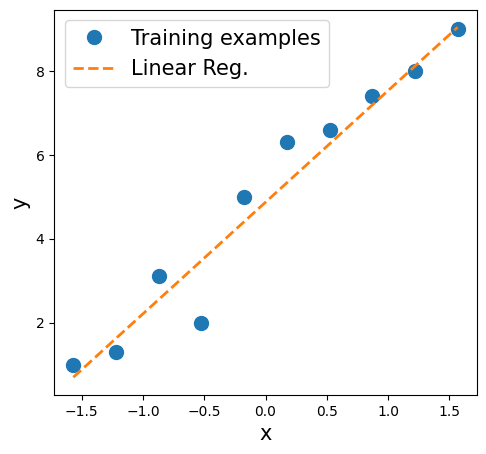

In [ ]:
x_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
x_test_norm = (x_test - np.mean(x_train)) / np.std(x_train)
x_test_norm = torch.from_numpy(x_test_norm)
y_pred = model(x_test_norm).detach().numpy()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(x_train_norm, y_train, 'o', markersize=10)
plt.plot(x_test_norm, y_pred, '--', lw=2)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
plt.show()

Multilayer perceptron for classifying flowers in the Iris dataset

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import torch.nn as nn

iris = load_iris()
x = iris['data']
y = iris['target']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=1./3, random_state=1)

In [ ]:
print(x_train.shape)
#print(x_train[1])
print(y_train.shape)
#print(y_train[1])

(100, 4)
(100,)


In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

x_train_norm = (x_train - np.mean(x_train)) / np.std(x_train)
x_train_norm = torch.from_numpy(x_train_norm).float()
y_train_norm = torch.from_numpy(y_train)

train_ds = TensorDataset(x_train_norm, y_train_norm)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)


In [ ]:
#print(x_train_norm.shape)
#print(x_train_norm)

In [ ]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x= self.layer2(x)
        x= nn.Softmax(dim=1)(x) # meaning of dim=1?
        return x

input_size = x_train_norm.shape[1]
hidden_size = 16
output_size = 3

model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)

In [ ]:
num_epochs = 200
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()

    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

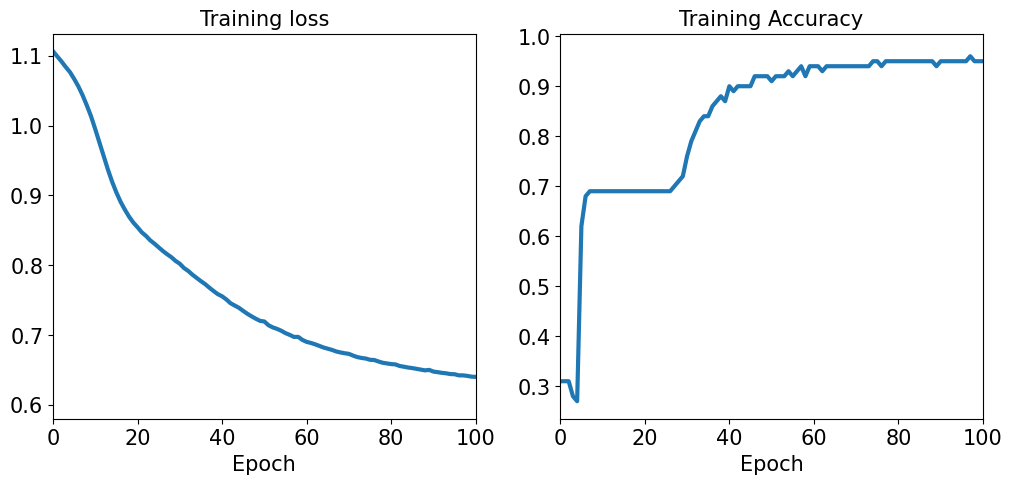

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_xbound(0, 100)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_xbound(0, 100)
ax.set_title('Training Accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)


In [ ]:

x_test_norm = (x_test - np.mean(x_train))/np.std(x_train)
x_test_norm = torch.from_numpy(x_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(x_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

print(f'Test Acc..: {accuracy:.4f}')

Test Acc..: 0.9800


In [ ]:

path = 'iris_classifier.pt'
torch.save(model, path)

In [ ]:
model_new = torch.load(path)
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [ ]:
pred_test = model_new(x_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

print(f'Test Acc.: {accuracy: .4f}')

Test Acc.:  0.9800


In [ ]:
path = 'iris_classifier_state.pt'
torch.save(model.state_dict(), path)

model_new = Model(input_size, hidden_size, output_size)
model_new.load_state_dict(torch.load(path))

<All keys matched successfully>

Activation functions

In [1]:
import numpy as np
x = np.array([1, 1.4, 2.5])
w = np.array([0.4, 0.3, 0.5])

def net_input(x, w):
    return np.dot(x, w)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(x, w):
    z = net_input(x, w)
    return logistic(z)

print('P(y=1|x) = %.3f' % logistic_activation(x, w))

P(y=1|x) = 0.888


In [2]:
W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])

A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])

y_probas = logistic(Z)
print('Output units : \n', Z)

Output units : 
 [1.78 0.76 1.65]


In [3]:
print('Unit output: \n', y_probas)

Unit output: 
 [0.85569687 0.68135373 0.83889105]


In [5]:
y_class = np.argmax(Z, axis=0)
print('Predicted class label: %d' %y_class)

Predicted class label: 0
